In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('critical_grain_stress_out.csv')
df2 = pd.read_csv('critical_grain_stress_king.csv')

In [3]:
df = pd.concat([df1, df2])

In [4]:
df

,Stream,S,D50,Q,V,h,w,D,gs_ratio,V_adj,h_adj,Di_D50,tau_g_star,D84,V_pred,D_mob,h_calc,w_adj
0,Cherry,0.0252,0.051000,1.514347,0.540003,0.336685,8.359404,0.0040,2.614327,2.857088,0.153099,0.078431,0.547018,NaN,NaN,NaN,NaN,NaN
1,Cherry,0.0252,0.051000,2.201554,0.653542,0.373594,9.002251,0.0080,2.382892,2.812906,0.177859,0.156863,0.317743,NaN,NaN,NaN,NaN,NaN
2,Cherry,0.0252,0.051000,3.848099,0.868874,0.436335,10.054709,0.0226,2.135555,2.802167,0.229266,0.443137,0.144984,NaN,NaN,NaN,NaN,NaN
3,Cherry,0.0252,0.051000,4.068735,0.893935,0.443150,10.166318,0.0450,1.788446,2.606620,0.244338,0.882353,0.077601,NaN,NaN,NaN,NaN,NaN
4,Cherry,0.0252,0.051000,4.471243,0.937994,0.454926,10.357991,0.0450,1.853766,2.669708,0.253262,0.882353,0.080435,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,Trapper Creek,0.0420,0.081625,1.294068,0.753116,0.306375,5.635922,NaN,NaN,2.362323,NaN,0.220521,0.161623,0.21267,1.121060,0.018,0.114291,4.792990
554,Trapper Creek,0.0420,0.081625,3.822738,1.340060,0.471498,6.108253,NaN,NaN,3.390697,NaN,0.306279,0.217234,0.21267,1.938213,0.025,0.213355,5.284244
555,Trapper Creek,0.0420,0.081625,1.987824,0.946320,0.363454,5.818567,NaN,NaN,2.972929,NaN,0.110260,0.383747,0.21267,1.401161,0.009,0.135682,4.928013
556,Trapper Creek,0.0420,0.081625,1.387512,0.781575,0.314996,5.665194,NaN,NaN,2.640533,NaN,0.098009,0.350889,0.21267,1.162979,0.008,0.110279,4.764871


In [5]:
x = np.arange(df['Di_D50'].min(), df['Di_D50'].max(), 0.01)
y = 0.038*x**-0.65
y1 = 0.017*x**-0.65
y2 = 0.087*x**-0.65

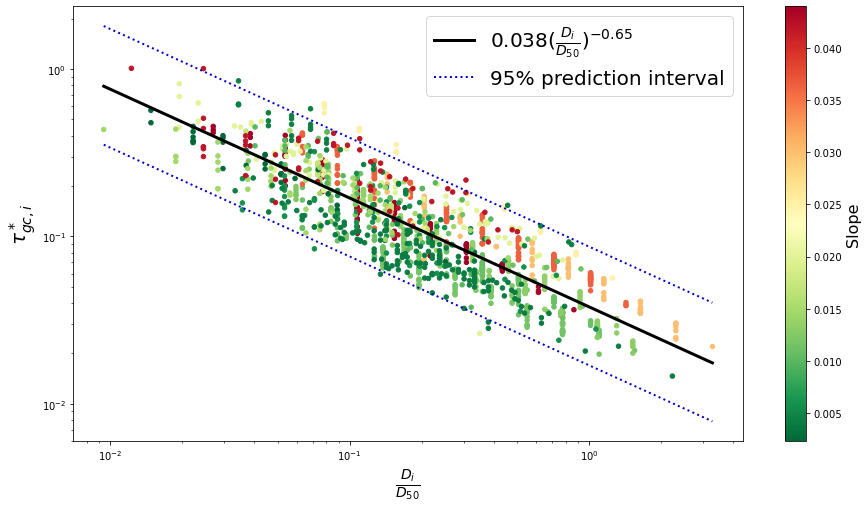

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
d = ax.scatter(df['Di_D50'], df['tau_g_star'], c=df['S'], cmap='RdYlGn_r', s=20)
ls = ax.plot(x, y, c='k', linewidth=3, label=r'$0.038(\frac{D_i}{D_{50}})^{-0.65}$')
ax.plot(x, y1, c='mediumblue', linestyle=':', linewidth=2, label='95% prediction interval')
ax.plot(x, y2, c='mediumblue', linestyle=':', linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\frac{D_i}{D_{50}}$', fontsize=20)
ax.set_ylabel(r'$\tau_{gc,i}^*$', fontsize=20)
plt.legend(fontsize=20)
cbar = fig.colorbar(d).set_label(label='Slope',size=16)
#plt.savefig('critical_grain_all_data.png', dpi=150)
plt.show()